In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (16,10)
plt.style.use("ggplot")
list_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [3]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"

In [4]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv)
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)

In [5]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()

In [6]:
#Fazendo drop em colunas que não serão ultilizadas.
suicide.drop("HDI for year", axis=1, inplace=True)
suicide.drop("country-year", axis=1, inplace=True)
suicide.drop("generation", axis=1, inplace=True)
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)

In [7]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
countries = pd.merge(suicide,country_continent,on=["country"], how="inner")

In [8]:
#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
result = pd.merge(countries,hdi, on=["country","year"], how="inner")

In [9]:
#Pegando os países por suas sub-regiões.
australia_newzeland = result[(result["sub_region"] == "Australia and New Zealand")]
caribbean = result[(result["sub_region"] == "Caribbean")]
central_america = result[(result["sub_region"] == "Central America")]
central_asia = result[(result["sub_region"] == "Central Asia")]
eastern_africa = result[(result["sub_region"] == "Eastern Africa")]
eastern_asia = result[(result["sub_region"] == "Eastern Asia")]
eastern_europe = result[(result["sub_region"] == "Eastern Europe")]
melanesia = result[(result["sub_region"] == "Melanesia")]
micronesia = result[(result["sub_region"] == "Micronesia")]
northern_america = result[(result["sub_region"] == "Northern America")]
northern_europe = result[(result["sub_region"] == "Northern Europe")]
south_america = result[(result["sub_region"] == "South America")]
south_eastern_asia = result[(result["sub_region"] == "South-Eastern Asia")]
southern_africa = result[(result["sub_region"] == "Southern Africa")]
southern_asia = result[(result["sub_region"] == "Southern Asia")]
southern_europe = result[(result["sub_region"] == "Southern Europe")]
western_africa = result[(result["sub_region"] == "Western Africa")]
western_asia = result[(result["sub_region"] == "Western Asia")]
western_europe = result[(result["sub_region"] == "Western Europe")]

In [10]:
#Pegando os países por continentes
africa = result[(result["continent"] == "Africa")]
americas = result[(result["continent"] == "Americas")]
asia = result[(result["continent"] == "Asia")]
europe = result[(result["continent"] == "Europe")]
Oceania = result[(result["continent"] == "Oceania")]

In [11]:
group_sa = south_america.groupby(["year","country","hdi"], as_index=False).sum()
group_ee = eastern_europe.groupby(["year","country","hdi"], as_index=False).sum()
group_ee.head(500)

,year,country,hdi,suicides_no,population,suicides/100kpop,gdp-per-capita
0,2000,Belarus,0.683,3483,9543479,447.30,16020
1,2000,Bulgaria,0.712,1383,7829095,259.22,20160
2,2000,Hungary,0.769,3269,9527034,464.56,59592
3,2000,Poland,0.785,5841,36233344,191.01,56928
4,2000,Romania,0.709,2836,21290400,159.19,21096
5,2000,Russian Federation,0.720,56619,138205695,504.47,22548
6,2000,Slovakia,0.764,729,5111813,180.08,68352
7,2000,Ukraine,0.671,14467,47125400,377.19,7956
8,2001,Belarus,0.689,3303,9513587,419.65,15588
9,2001,Bulgaria,0.722,1314,7591926,244.62,22248


In [12]:
#Função para colocar valores nulos.
def insert_zero(df,start = 2000, end = 2016):
    country_list = list(df["country"].unique())
    for year in range(start,end):
        for country in country_list:
            if len(df[(df["country"] == country) & (df["year"] == year)]) == 0:
                df2 = pd.DataFrame({"country": [country], "year": [year], "hdi" : [0]})
                df = df.append(df2, ignore_index=True)
    return df


In [13]:
#Atribuindo os valores nulos ao dataframe.
group_sa = insert_zero(group_sa)
group_ee = insert_zero(group_ee)

C:\Users\Eudes\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [14]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [15]:
#TESTE
#country_list = list(group_sa["country"].unique())
#country_hdi = list(group_sa["hdi"][group_sa["country"] == "Argentina"])
#country_year = list(group_sa["year"].unique())

In [16]:
#Função para gerar gráfico de idh.
def gerar_grafico(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    df = df[(df["year"]>= start) & (df["year"] < end)]
    
    country_name = list(df["country"].unique())
    country_year = np.asarray([x for x in range(start,end)])
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [17]:
#Função para gerar gráfico de taxa de suicídio.
def gerar_grafico_suicide(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    df = df[(df["year"]>= start) & (df["year"] < end)]
    
    country_name = list(df["country"].unique())
    country_year = np.asarray([x for x in range(start,end)])
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/ df["population"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [18]:
#gerar_grafico(group_sa, "IDH", "Anos", "Indice de Desenvolvimento Humano no país",0.09,2000,2008)

In [19]:
#gerar_grafico(group_sa, "IDH", "Anos", "Indice de Desenvolvimento Humano no país",0.09,2008,2016)

In [20]:
#gerar_grafico_suicide(group_sa, "Taxa de suicídio", "Anos", "Taxa de suicídio no país por 100k Habitantes",0.09,2000,2008)

In [21]:
#gerar_grafico_suicide(group_sa, "Taxa de suicídio", "Anos", "Taxa de suicídio no país por 100k Habitantes",0.09,2008,2016)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


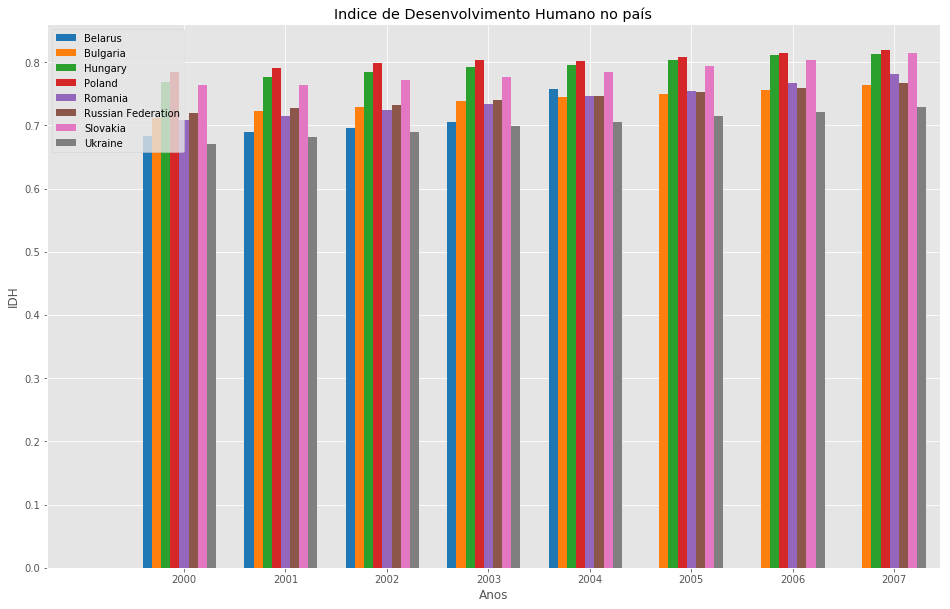

In [22]:
gerar_grafico(group_ee, "IDH", "Anos", "Indice de Desenvolvimento Humano no país",0.09,2000,2008)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


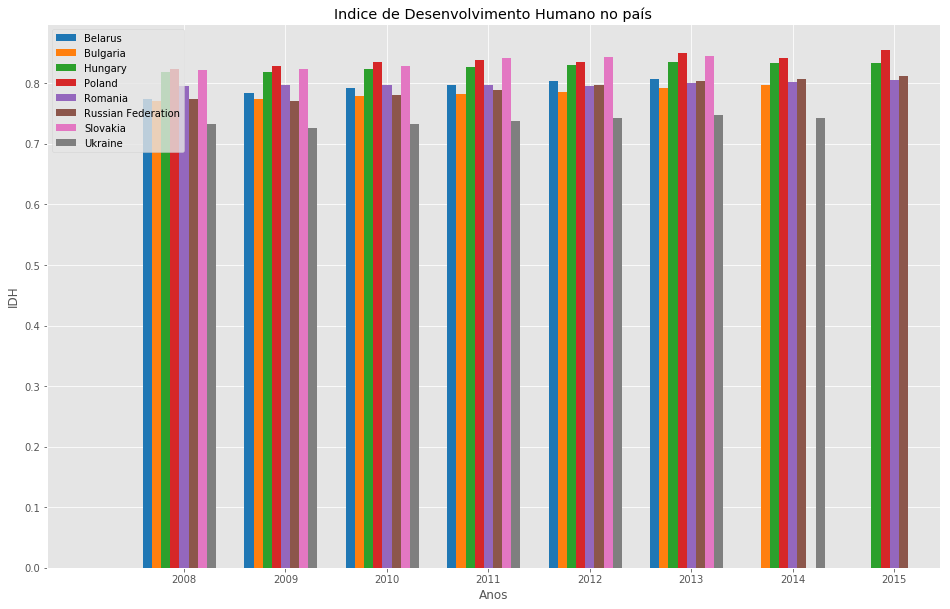

In [23]:
gerar_grafico(group_ee, "IDH", "Anos", "Indice de Desenvolvimento Humano no país",0.09,2008,2016)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Belarus [2000 2001 2002 2003 2004 2005 2006 2007]
Bulgaria [2000 2001 2002 2003 2004 2005 2006 2007]
Hungary [2000 2001 2002 2003 2004 2005 2006 2007]
Poland [2000 2001 2002 2003 2004 2005 2006 2007]
Romania [2000 2001 2002 2003 2004 2005 2006 2007]
Russian Federation [2000 2001 2002 2003 2004 2005 2006 2007]
Slovakia [2000 2001 2002 2003 2004 2005 2006 2007]
Ukraine [2000 2001 2002 2003 2004 2005 2006 2007]


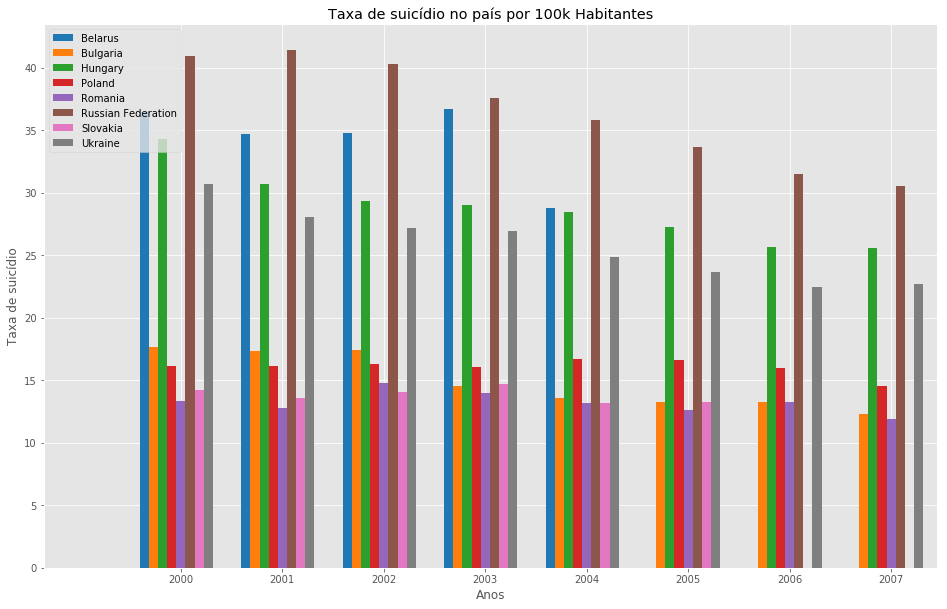

In [24]:
gerar_grafico_suicide(group_ee, "Taxa de suicídio", "Anos", "Taxa de suicídio no país por 100k Habitantes",0.09,2000,2008)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Belarus [2008 2009 2010 2011 2012 2013 2014 2015]
Bulgaria [2008 2009 2010 2011 2012 2013 2014 2015]
Hungary [2008 2009 2010 2011 2012 2013 2014 2015]
Poland [2008 2009 2010 2011 2012 2013 2014 2015]
Romania [2008 2009 2010 2011 2012 2013 2014 2015]
Russian Federation [2008 2009 2010 2011 2012 2013 2014 2015]
Slovakia [2008 2009 2010 2011 2012 2013 2014 2015]
Ukraine [2008 2009 2010 2011 2012 2013 2014 2015]


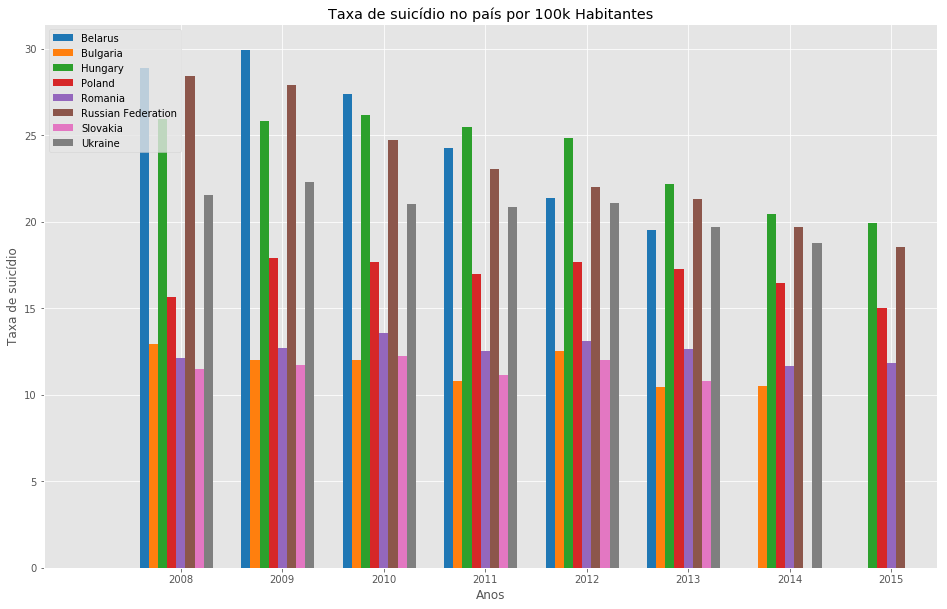

In [25]:
gerar_grafico_suicide(group_ee, "Taxa de suicídio", "Anos", "Taxa de suicídio no país por 100k Habitantes",0.09,2008,2016)